In [104]:
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(ride_data, city_data, on = "city", how = "left")

# Display the data table for preview

combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

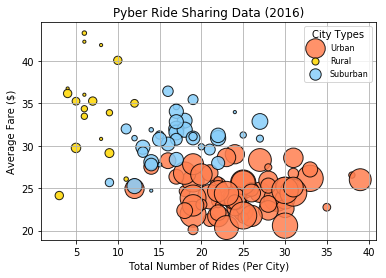

In [121]:
# Obtain the x and y coordinates for each of the three city types

# Let's check what types do we have

types = combined_df["type"].value_counts()

# Obtain the data frame for the Urban city type and then group the data frame by city

urban_city_type = combined_df.loc[combined_df["type"] == "Urban"]
urban_city_type = urban_city_type.groupby(["city"])

# Obtain the data frame for the Rural city type and then group the data frame by city

rural_city_type = combined_df.loc[combined_df["type"] == "Rural"]
rural_city_type = rural_city_type.groupby(["city"])

# Obtain the data frame for the Suburban city type and then group the data frame by city

suburban_city_type = combined_df.loc[combined_df["type"] == "Suburban"]
suburban_city_type = suburban_city_type.groupby(["city"])


# Urban calculations of ride count (x), fare average(y), max driver count (s - scalar value, as size)

x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].max()

# Rural calculations of ride count (x), fare average(y), max driver count (s - scalar value, as size)

x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].max()

# Suburban calculations of ride count (x), fare average(y), max driver count (s - scalar value, as size)

x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].max()

# Build the scatter plots for each city types

plt.scatter(x_urban, y_urban, label = "Urban", marker = "o", facecolors = "coral", edgecolors = "black", s = s_urban * 10 , alpha = 0.85, linewidths = 1)
plt.scatter(x_rural, y_rural, label = "Rural", marker = "o", facecolors = "gold", edgecolors = "black", s = s_rural * 10, alpha = 0.85, linewidths = 1)
plt.scatter(x_suburban, y_suburban, label = "Suburban", marker = "o", facecolors = "lightskyblue", edgecolors = "black", s = s_suburban * 10, alpha = 0.85, linewidths = 1)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend

plt.legend(title = "City Types", loc = "upper right", fontsize = 8)

# Incorporate a text label regarding circle size

# Save Figure


In [103]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


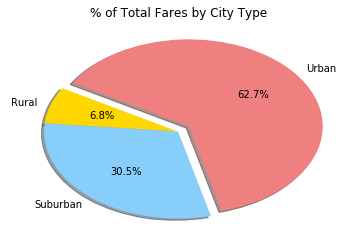

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


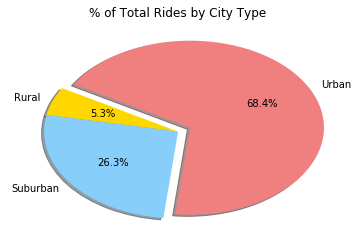

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


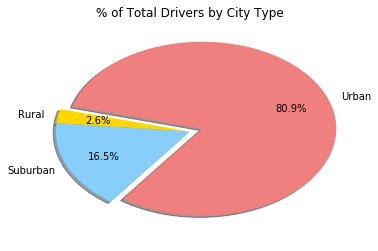

In [6]:
# Show Figure
plt.show()